### Haramrit Singh Khurana
## Data Mining CS8584 - HW2 

# <span style="color: red">Local Experimenting Copy:</span>

### Given attributes in dataset
- id - unique identifier
- F1 - Continuous value describing number of years since last degree was completed
- F2 - Continuous value indicating hours worked per week
- F3 - Categorical Value
- F4 - Categorical Value indicating type of occupation
- F5 - continuous value denoting gains
- F6 - continuous value denoting loss
- F7 - Categorical value denoting marital status
- F8 - Categorical value denoting type of employment (e.g., Self)
- F9 - Categorical Value denoting education type
- F10 - Categorical Value denoting different race
- F11 - Categorical - Female/Male
- credit - 0: Bad, 1: Good

## Common import statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

### Read train and test dataset

In [2]:
train_data = pd.read_csv("1600106342_882043_train.csv")
train_data

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,credit
0,0,13,40,1,1,2174,0,4,7,9,White,Male,0
1,1,13,13,0,4,0,0,2,6,9,White,Male,0
2,2,9,40,1,6,0,0,0,4,11,White,Male,0
3,3,7,40,0,6,0,0,2,4,1,Black,Male,0
4,4,13,40,5,10,0,0,2,4,9,Black,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,12,38,5,13,0,0,2,4,7,White,Female,0
32557,32557,9,40,0,7,0,0,2,4,11,White,Male,1
32558,32558,9,40,4,1,0,0,6,4,11,White,Female,0
32559,32559,9,20,3,1,0,0,4,4,11,White,Male,0


In [3]:
test_data = pd.read_csv("1600106342_8864183_test.csv")
test_data

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,0,7,40,3,7,0,0,4,4,1,Black,Male
1,1,12,40,0,11,0,0,2,2,7,White,Male
2,2,10,40,0,7,7688,0,2,4,15,Black,Male
3,3,10,30,3,0,0,0,4,0,15,White,Female
4,4,6,30,1,8,0,0,4,4,0,White,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
13300,13300,13,40,3,10,0,0,4,4,9,White,Male
13301,13301,13,36,1,10,0,0,0,4,9,White,Female
13302,13302,9,40,2,0,0,0,6,0,11,Black,Male
13303,13303,13,50,0,10,0,0,2,4,9,White,Male


### Checking for null values

In [4]:
# check for null values

print(train_data.isnull().sum())
print(test_data.isnull().sum())

id        0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
credit    0
dtype: int64
id     0
F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
dtype: int64


### Drop id column since it does not affect the classification/prediction

In [5]:
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

### Rename columns to appropriate names for easier understanding

In [6]:
train_data = train_data.rename(columns={"F1": "yearsSinceLastDegree", "F2": "hoursWorkedPerWeek", "F3": "unknownCategoricalVal", "F4": "typeOfOccupation", "F5": "gains", "F6": "loss", "F7": "maritalStatus", "F8": "employmentType", "F9": "educationType", "F10": "race", "F11": "gender"})
test_data = test_data.rename(columns={"F1": "yearsSinceLastDegree", "F2": "hoursWorkedPerWeek", "F3": "unknownCategoricalVal", "F4": "typeOfOccupation", "F5": "gains", "F6": "loss", "F7": "maritalStatus", "F8": "employmentType", "F9": "educationType", "F10": "race", "F11": "gender"})

In [7]:
train_data

,yearsSinceLastDegree,hoursWorkedPerWeek,unknownCategoricalVal,typeOfOccupation,gains,loss,maritalStatus,employmentType,educationType,race,gender,credit
0,13,40,1,1,2174,0,4,7,9,White,Male,0
1,13,13,0,4,0,0,2,6,9,White,Male,0
2,9,40,1,6,0,0,0,4,11,White,Male,0
3,7,40,0,6,0,0,2,4,1,Black,Male,0
4,13,40,5,10,0,0,2,4,9,Black,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,38,5,13,0,0,2,4,7,White,Female,0
32557,9,40,0,7,0,0,2,4,11,White,Male,1
32558,9,40,4,1,0,0,6,4,11,White,Female,0
32559,9,20,3,1,0,0,4,4,11,White,Male,0


In [8]:
test_data

,yearsSinceLastDegree,hoursWorkedPerWeek,unknownCategoricalVal,typeOfOccupation,gains,loss,maritalStatus,employmentType,educationType,race,gender
0,7,40,3,7,0,0,4,4,1,Black,Male
1,12,40,0,11,0,0,2,2,7,White,Male
2,10,40,0,7,7688,0,2,4,15,Black,Male
3,10,30,3,0,0,0,4,0,15,White,Female
4,6,30,1,8,0,0,4,4,0,White,Male
...,...,...,...,...,...,...,...,...,...,...,...
13300,13,40,3,10,0,0,4,4,9,White,Male
13301,13,36,1,10,0,0,0,4,9,White,Female
13302,9,40,2,0,0,0,6,0,11,Black,Male
13303,13,50,0,10,0,0,2,4,9,White,Male


### Encoding gender and race using numerical codes

In [9]:
# For training data

print("Distribution of race attribute")
print(train_data['race'].value_counts())
train_data['race'] = train_data['race'].astype('category')
train_data['race_encoded'] = train_data['race'].cat.codes

print("Distribution of gender attribute")
print(train_data['gender'].value_counts())
train_data['gender'] = train_data['gender'].astype('category')
train_data['gender_encoded'] = train_data['gender'].cat.codes

Distribution of race attribute
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64
Distribution of gender attribute
 Male      21790
 Female    10771
Name: gender, dtype: int64


In [10]:
# For testing data

print("Distribution of race attribute")
print(test_data['race'].value_counts())
test_data['race'] = test_data['race'].astype('category')
test_data['race_encoded'] = test_data['race'].cat.codes

print("Distribution of gender attribute")
print(test_data['gender'].value_counts())
test_data['gender'] = test_data['gender'].astype('category')
test_data['gender_encoded'] = test_data['gender'].cat.codes

Distribution of race attribute
 White                 11422
 Black                  1244
 Asian-Pac-Islander      386
 Amer-Indian-Eskimo      138
 Other                   115
Name: race, dtype: int64
Distribution of gender attribute
 Male      8906
 Female    4399
Name: gender, dtype: int64


### Normalize continuous feature values

In [11]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

#### Before normalization:

In [12]:
train_data

,yearsSinceLastDegree,hoursWorkedPerWeek,unknownCategoricalVal,typeOfOccupation,gains,loss,maritalStatus,employmentType,educationType,race,gender,credit,race_encoded,gender_encoded
0,13,40,1,1,2174,0,4,7,9,White,Male,0,4,1
1,13,13,0,4,0,0,2,6,9,White,Male,0,4,1
2,9,40,1,6,0,0,0,4,11,White,Male,0,4,1
3,7,40,0,6,0,0,2,4,1,Black,Male,0,2,1
4,13,40,5,10,0,0,2,4,9,Black,Female,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,38,5,13,0,0,2,4,7,White,Female,0,4,0
32557,9,40,0,7,0,0,2,4,11,White,Male,1,4,1
32558,9,40,4,1,0,0,6,4,11,White,Female,0,4,0
32559,9,20,3,1,0,0,4,4,11,White,Male,0,4,1


#### Performing normalization in train and test dataset

In [13]:
continuous_attributes = ['hoursWorkedPerWeek','yearsSinceLastDegree','gains','loss']
train_data[continuous_attributes] = normalize(train_data[continuous_attributes])
test_data[continuous_attributes] = normalize(test_data[continuous_attributes])

#### After normalization:

In [14]:
train_data

,yearsSinceLastDegree,hoursWorkedPerWeek,unknownCategoricalVal,typeOfOccupation,gains,loss,maritalStatus,employmentType,educationType,race,gender,credit,race_encoded,gender_encoded
0,0.800000,0.397959,1,1,0.021740,0.0,4,7,9,White,Male,0,4,1
1,0.800000,0.122449,0,4,0.000000,0.0,2,6,9,White,Male,0,4,1
2,0.533333,0.397959,1,6,0.000000,0.0,0,4,11,White,Male,0,4,1
3,0.400000,0.397959,0,6,0.000000,0.0,2,4,1,Black,Male,0,2,1
4,0.800000,0.397959,5,10,0.000000,0.0,2,4,9,Black,Female,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.733333,0.377551,5,13,0.000000,0.0,2,4,7,White,Female,0,4,0
32557,0.533333,0.397959,0,7,0.000000,0.0,2,4,11,White,Male,1,4,1
32558,0.533333,0.397959,4,1,0.000000,0.0,6,4,11,White,Female,0,4,0
32559,0.533333,0.193878,3,1,0.000000,0.0,4,4,11,White,Male,0,4,1


In [15]:
feature_cols = list(train_data.columns)
feature_cols.remove('credit')
feature_cols.remove('gender')
feature_cols.remove('race')

feature_cols

['yearsSinceLastDegree',
 'hoursWorkedPerWeek',
 'unknownCategoricalVal',
 'typeOfOccupation',
 'gains',
 'loss',
 'maritalStatus',
 'employmentType',
 'educationType',
 'race_encoded',
 'gender_encoded']

### Convert all features to datatype 'float' for consistency among datatypes

### Before:

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   yearsSinceLastDegree   32561 non-null  float64 
 1   hoursWorkedPerWeek     32561 non-null  float64 
 2   unknownCategoricalVal  32561 non-null  int64   
 3   typeOfOccupation       32561 non-null  int64   
 4   gains                  32561 non-null  float64 
 5   loss                   32561 non-null  float64 
 6   maritalStatus          32561 non-null  int64   
 7   employmentType         32561 non-null  int64   
 8   educationType          32561 non-null  int64   
 9   race                   32561 non-null  category
 10  gender                 32561 non-null  category
 11  credit                 32561 non-null  int64   
 12  race_encoded           32561 non-null  int8    
 13  gender_encoded         32561 non-null  int8    
dtypes: category(2), float64(4), int64(6), 

In [17]:
train_data[feature_cols] = train_data[feature_cols].astype('float')
test_data[feature_cols] = test_data[feature_cols].astype('float')

### After:

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   yearsSinceLastDegree   32561 non-null  float64 
 1   hoursWorkedPerWeek     32561 non-null  float64 
 2   unknownCategoricalVal  32561 non-null  float64 
 3   typeOfOccupation       32561 non-null  float64 
 4   gains                  32561 non-null  float64 
 5   loss                   32561 non-null  float64 
 6   maritalStatus          32561 non-null  float64 
 7   employmentType         32561 non-null  float64 
 8   educationType          32561 non-null  float64 
 9   race                   32561 non-null  category
 10  gender                 32561 non-null  category
 11  credit                 32561 non-null  int64   
 12  race_encoded           32561 non-null  float64 
 13  gender_encoded         32561 non-null  float64 
dtypes: category(2), float64(11), int64(1)


### Calculating feature importance

Feature: 0, Score: 0.12205
Feature: 1, Score: 0.15323
Feature: 2, Score: 0.14494
Feature: 3, Score: 0.09785
Feature: 4, Score: 0.17015
Feature: 5, Score: 0.05756
Feature: 6, Score: 0.10714
Feature: 7, Score: 0.06217
Feature: 8, Score: 0.04264
Feature: 9, Score: 0.02608
Feature: 10, Score: 0.01619


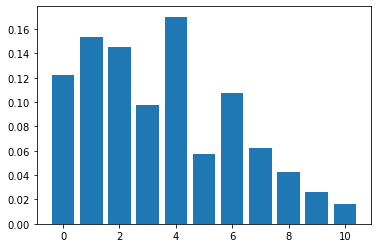

In [19]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(train_data[feature_cols], train_data['credit'])
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Planned on removing race_encoded and gender_encoded due to low importance, but reduced F1 score on Miner. Hence keeping them as is.

In [20]:
# feature_cols.remove('race_encoded')
# feature_cols.remove('gender_encoded')

feature_cols

['yearsSinceLastDegree',
 'hoursWorkedPerWeek',
 'unknownCategoricalVal',
 'typeOfOccupation',
 'gains',
 'loss',
 'maritalStatus',
 'employmentType',
 'educationType',
 'race_encoded',
 'gender_encoded']

## Upsampling/downsampling to take care of imbalanced classes in dataset

In [21]:
from collections import Counter
a = Counter(train_data['credit'])
a

Counter({0: 24720, 1: 7841})

In [22]:
from sklearn.utils import resample

## Downsampling

In [23]:
train_data_majority = train_data[train_data['credit']==0]
train_data_minority = train_data[train_data['credit']==1]

train_data_majority_downsampled = resample(train_data_majority, 
                                 replace=False,                          # sample without replacement
                                 n_samples=len(train_data_minority),     # to match minority class size
                                 random_state=123)                       # reproducible results


# Combine minority class with downsampled majority class
train_data_downsampled = pd.concat([train_data_majority_downsampled, train_data_minority])
 
# Display new class counts
train_data_downsampled['credit'].value_counts()

1    7841
0    7841
Name: credit, dtype: int64

In [24]:
len(train_data_downsampled)

15682

## Upsampling

In [25]:
train_data_majority = train_data[train_data['credit']==0]
train_data_minority = train_data[train_data['credit']==1]

train_data_minority_upsampled = resample(train_data_minority, 
                                 replace=True,                  # sample without replacement
                                 n_samples=len(train_data_majority),     # to match minority class
                                 random_state=123)               # reproducible results


# Combine minority class with downsampled majority class
train_data_upsampled = pd.concat([train_data_minority_upsampled, train_data_majority])
 
# Display new class counts
train_data_upsampled['credit'].value_counts()

1    24720
0    24720
Name: credit, dtype: int64

In [26]:
len(train_data_upsampled)

49440

## Normal dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_data[feature_cols], train_data['credit'], test_size=0.2, random_state=1)

In [28]:
X_train.shape

(26048, 11)

In [29]:
X_test.shape

(6513, 11)

## Downsampled dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_data_downsampled[feature_cols], train_data_downsampled['credit'], test_size=0.2, random_state=1)

In [31]:
X_train.shape

(12545, 11)

In [32]:
X_test.shape

(3137, 11)

## Upsampled dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train_data_upsampled[feature_cols], train_data_upsampled['credit'], test_size=0.2, random_state=1)

In [34]:
X_train.shape

(39552, 11)

In [35]:
X_test.shape

(9888, 11)

## Testing with various classification models:
 - Logistic regression
 - KNN
 - Decision Tree
 - Random Forest Ensemble Learning
 - Multi Layer Perceptron Classifier (Neural Network)

- ### Logistic Regression:

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=40000)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("F1-score => ",metrics.f1_score(y_test, y_pred))

F1-score =>  0.7639347543280296


- ### KNN:

k =  1 , F1-score => 0.8455613325630656
k =  3 , F1-score => 0.8420349336642169
k =  5 , F1-score => 0.8327307326355852
k =  7 , F1-score => 0.8303836219267198
k =  9 , F1-score => 0.8224662326304538
k =  11 , F1-score => 0.8191780821917808
k =  13 , F1-score => 0.8161144873554205
k =  15 , F1-score => 0.8138067061143983
k =  17 , F1-score => 0.8117440499414748
k =  19 , F1-score => 0.8107264748902974
k =  21 , F1-score => 0.813124939326279
k =  23 , F1-score => 0.810099434587639
k =  25 , F1-score => 0.8156885308784042
k =  27 , F1-score => 0.8074944180176682
k =  29 , F1-score => 0.8080552582936084
k =  31 , F1-score => 0.8066588785046729
k =  33 , F1-score => 0.8057987935395992
k =  35 , F1-score => 0.8043098427489807
k =  37 , F1-score => 0.8033203125000001
k =  39 , F1-score => 0.8012531819071862
k =  41 , F1-score => 0.8019436345966958
k =  43 , F1-score => 0.8030362008563643
k =  45 , F1-score => 0.8013355592654424
k =  47 , F1-score => 0.8003140025512707
k =  49 , F1-score => 0

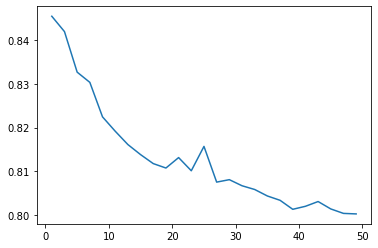

In [37]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

f1_list = list()
k_list = list()

for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    F1Score = metrics.f1_score(y_test, y_pred).item()
    print("k = ",k,", F1-score =>" ,F1Score)
    k_list.append(k)
    f1_list.append(F1Score)
    
pyplot.plot(k_list, f1_list)
pyplot.show()

# Choosing k = 3 after this experiment

- ### Decision Tree:

for depth =  1  => 
F1-score =>  0.7478108581436077
for depth =  2  => 
F1-score =>  0.7870872804193876
for depth =  3  => 
F1-score =>  0.8089057148007932
for depth =  4  => 
F1-score =>  0.8175725986597169
for depth =  5  => 
F1-score =>  0.8332420091324201
for depth =  6  => 
F1-score =>  0.8305754042873261
for depth =  7  => 
F1-score =>  0.8370624825921457
for depth =  8  => 
F1-score =>  0.8412333179935573
for depth =  9  => 
F1-score =>  0.8446530461991534
for depth =  10  => 
F1-score =>  0.8288822947576657
for depth =  11  => 
F1-score =>  0.840115718418515
for depth =  12  => 
F1-score =>  0.848271263929898
for depth =  13  => 
F1-score =>  0.8572779721933226
for depth =  14  => 
F1-score =>  0.8622777147181233
for depth =  15  => 
F1-score =>  0.8658237403283638
for depth =  16  => 
F1-score =>  0.8685206205069996
for depth =  17  => 
F1-score =>  0.8711102754536053
for depth =  18  => 
F1-score =>  0.8728432108027007
for depth =  19  => 
F1-score =>  0.8756471806457686
for 

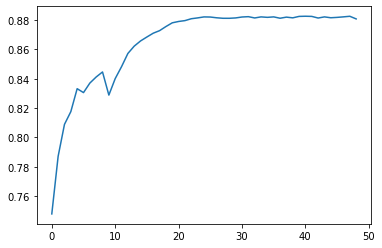

In [38]:
 # Decision Tree
from sklearn.tree import DecisionTreeClassifier
max_depth_list = list()
for i in range(1,50):
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    max_depth_list.append(metrics.f1_score(y_test, y_pred))
    print("for depth = ",i," => ")
    print("F1-score => ",metrics.f1_score(y_test, y_pred))

pyplot.plot([x for x in range(0, len(max_depth_list))], max_depth_list)
pyplot.show()

# After this experiment, it is clear that the max_depth value saturates after around 30.
# So to keep the decision tree efficient, I would go with a max_depth value of 30

- ### Random Forest Classifier:

In [39]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=80, oob_score=False, n_jobs=-1, min_samples_leaf=10, max_leaf_nodes=100, max_depth=20)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)
print("F1-score => ",metrics.f1_score(y_test, y_pred))

F1-score =>  0.8414876502318538


- ### Multi Layer Perceptron Classifier (Neural Network):

In [40]:
from sklearn.neural_network import MLPClassifier

multi_layer_perceptron = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(30,30,30))
multi_layer_perceptron.fit(X_train, y_train)
y_pred = multi_layer_perceptron.predict(X_test)
print("F1-score => ",metrics.f1_score(y_test, y_pred))

F1-score =>  0.8241747848292822


## Cross validation with all the above models

In [41]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=5, random_state=101, shuffle=True)

knn = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
clf = DecisionTreeClassifier(criterion='gini', max_depth=30)
rfm = RandomForestClassifier(n_estimators=80, oob_score=False, n_jobs=-1, 
                             min_samples_leaf = 10, max_leaf_nodes=100, max_depth=20)
mlp = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(30,30,30))
lr  = LogisticRegression(max_iter=40000)

models = [knn, clf, rfm, mlp, lr]

scores_normal, scores_downsampled, scores_upsampled = dict(), dict(), dict()

for model in models:
    scores_upsampled[model] = np.mean(cross_val_score(model, train_data_upsampled[feature_cols],
                                                      train_data_upsampled['credit'], scoring='f1',
                                                      cv=cv, n_jobs=-1))
    scores_downsampled[model] = np.mean(cross_val_score(model, train_data_downsampled[feature_cols],
                                                        train_data_downsampled['credit'], scoring='f1',
                                                        cv=cv, n_jobs=-1))
    scores_normal[model] = np.mean(cross_val_score(model, train_data[feature_cols], 
                                                   train_data['credit'], scoring='f1',
                                                   cv=cv, n_jobs=-1))
    

In [42]:
scores_upsampled

{KNeighborsClassifier(n_jobs=-1, n_neighbors=49): 0.8034246436859934,
 DecisionTreeClassifier(): 0.8748531038529082,
 RandomForestClassifier(max_depth=20, max_leaf_nodes=100, min_samples_leaf=10,
                        n_estimators=80, n_jobs=-1): 0.8375887096331682,
 MLPClassifier(alpha=1, hidden_layer_sizes=(30, 30, 30), max_iter=1000): 0.8138029846612076,
 LogisticRegression(max_iter=40000): 0.7558105420125232}

In [43]:
scores_downsampled

{KNeighborsClassifier(n_jobs=-1, n_neighbors=49): 0.780926093004503,
 DecisionTreeClassifier(): 0.7949309829971514,
 RandomForestClassifier(max_depth=20, max_leaf_nodes=100, min_samples_leaf=10,
                        n_estimators=80, n_jobs=-1): 0.8309301599441389,
 MLPClassifier(alpha=1, hidden_layer_sizes=(30, 30, 30), max_iter=1000): 0.8150196583601084,
 LogisticRegression(max_iter=40000): 0.7588557060835726}

In [44]:
scores_normal

{KNeighborsClassifier(n_jobs=-1, n_neighbors=49): 0.5848678875365835,
 DecisionTreeClassifier(): 0.6285534658435813,
 RandomForestClassifier(max_depth=20, max_leaf_nodes=100, min_samples_leaf=10,
                        n_estimators=80, n_jobs=-1): 0.6489216153544912,
 MLPClassifier(alpha=1, hidden_layer_sizes=(30, 30, 30), max_iter=1000): 0.5796846975868155,
 LogisticRegression(max_iter=40000): 0.537297667664291}

### Conclusion: 
After looking at the cross validation results, I chose the <span style="color: red">**Random Forest classifier**</span> since it gives better F1 score on the downsampled and the normal datasets. It however loses against Decision Tree classifier for the upsampled dataset.
Now, after having chosen the Random Forest CLassifier, I tried training it with all three types of datasets - upsampled, downsampled, and normal, and tested it on Miner. And the <span style="color: red">**upsampled**</span> variant gave me the best F1-score i.e. <span style="color: red">**0.66**</span>

## Extra

#### Trying to combat Minh Quan Do's issue on Piazza that I was facing too - local model selection vs miner model selection not consistent

##### Confusion Matrix

|                	| Positive Prediction 	| Negative Prediction 	|
|----------------	|---------------------	|---------------------	|
| Positive Class 	| TP                  	| FN                  	|
| Negative Class 	| FP                  	| TN                  	|

In [45]:
def calculate_f1_score(p,r):
    return float(2*p*r/(p+r))

In [46]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)

In [47]:
true_pos = conf_mat[0][0]
false_neg = conf_mat[0][1]
false_pos = conf_mat[1][0]
true_neg = conf_mat[1][1]

In [48]:
# The ideal way

precision = true_pos / (true_pos + false_pos)
print("Precision = ",precision)

recall = true_pos / (true_pos + false_neg)
print("Recall = ",recall)

F1_score = calculate_f1_score(precision, recall)
print("F1_score = ",F1_score)

Precision =  0.8456932289267619
Recall =  0.7554001234313927
F1_score =  0.798000651961317


In [49]:
# The trial way

precision = true_neg / (true_neg + false_neg)
print("Precision = ",precision)

recall = true_neg / (true_neg + false_pos)
print("Recall = ",recall)

F1_score = calculate_f1_score(precision, recall)
print("F1_score = ",F1_score)

Precision =  0.785611251352326
Recall =  0.8667197135468471
F1_score =  0.8241747848292822
